No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


len: 490
{(413, 438): 0, (419, 487): 0, (417, 487): 1, (414, 487): 0, (419, 483): 0, (417, 478): 2, (612, 476): 0, (601, 503): 0, (715, 568): 1, (415, 518): 0, (609, 478): 0, (396, 521): 0, (417, 498): 0, (417, 510): 0, (413, 522): 0, (421, 567): 0, (406, 491): 0, (420, 481): 0, (412, 474): 2, (401, 491): 0, (415, 468): 2, (413, 473): 1, (415, 453): 0, (409, 299): 0, (412, 550): 0, (407, 515): 1, (407, 473): 0, (411, 480): 1, (598, 508): 0, (404, 479): 0, (450, 313): 0, (406, 497): 0, (417, 467): 0, (412, 478): 1, (408, 552): 0, (416, 478): 1, (410, 479): 0, (415, 485): 0, (412, 527): 1, (717, 528): 0, (414, 567): 0, (605, 486): 0, (416, 553): 0, (415, 497): 0, (410, 481): 2, (399, 473): 0, (417, 492): 0, (410, 477): 1, (415, 567): 1, (408, 559): 0, (417, 495): 0, (683, 513): 0, (606, 451): 0, (407, 479): 0, (424, 492): 0, (605, 462): 0, (415, 477): 2, (419, 553): 0, (408, 527): 0, (407, 493): 0, (424, 506): 0, (415, 515): 0, (599, 472): 0, (411, 481): 0, (413, 474): 1, (414, 478): 0, 

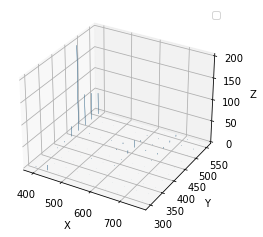

In [8]:
import os
import torch

gpus = "2,7"
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = gpus

if __name__ == "__main__":
    
    
    """devices = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print("Device: %s: %s" % (devices, str(gpus)))

    torch.rand((10,10)).to(devices)
    torch.rand((10,10)).to(devices)
    print(os.path.abspath(__file__))
    print(os.path.dirname( os.path.abspath(__file__) ))

    for i in range(10):
        torch.rand((10,10)).to(devices)"""

    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np

    _dir = '/data1/sdi/datasets/CPN_all'

    images = [os.path.join(_dir, 'Images', x) for x in os.listdir(os.path.join(_dir, 'Images'))]
    masks = [os.path.join(_dir, 'Masks', x) for x in os.listdir(os.path.join(_dir, 'Masks'))]

    print(f'len: {len(images)}')

    X, Y = [], []
    shape = {}

    for im in images:
        x = Image.open(im).convert('L')
        x1, x2 = x.size
        if x.size not in shape.keys():
            shape[x.size] = 0
        else:
            shape[x.size] += 1
        X.append(x1)
        Y.append(x2)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.legend()
    plt.show()


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

_dir = '/data1/sdi/datasets/CPN_all'

images = [os.path.join(_dir, 'Images', x) for x in os.listdir(os.path.join(_dir, 'Images'))]
masks = [os.path.join(_dir, 'Masks', x) for x in os.listdir(os.path.join(_dir, 'Masks'))]

print(f'len: {len(images)}')

X, Y = [], []

h_min, h_max, w_min, w_max = [], [], [], []
for ma in masks:
    m = Image.open(ma).convert('L') # H x W
    h,w = np.where(np.array(m) > 0)
    h_min.append(h.min())
    h_max.append(h.max())
    w_min.append(w.min())
    w_max.append(w.max())
h_min = np.array(h_min)
h_max = np.array(h_max)
w_min = np.array(w_min)
w_max = np.array(w_max)
print(f'h_min mean: {h_min.mean():.4f}/{h_min.std():.4f}, min/max: {h_min.min()}/{h_min.max()}')
print(f'h_max mean: {h_max.mean():.4f}/{h_max.std():.4f}, min/max: {h_max.min()}/{h_max.max()}')
print(f'w_min mean: {w_min.mean():.4f}/{w_min.std():.4f}, min/max: {w_min.min()}/{w_min.max()}')
print(f'w_max mean: {w_max.mean():.4f}/{w_max.std():.4f}, min/max: {w_max.min()}/{w_max.max()}')

len: 490
h_min mean: 83.5837/37.1330, min/max: 14/237
h_max mean: 134.4469/45.7486, min/max: 43/339
w_min mean: 150.8102/62.2691, min/max: 11/459
w_max mean: 291.2694/66.1008, min/max: 144/573


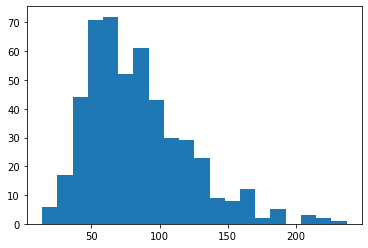

In [41]:
plt.hist(h_min, bins=20)
plt.show()

(array([ 4.,  9., 51., 81., 56., 51., 69., 50., 39., 29., 15., 13.,  8.,
         5.,  5.,  1.,  2.,  0.,  0.,  2.]),
 array([ 43. ,  57.8,  72.6,  87.4, 102.2, 117. , 131.8, 146.6, 161.4,
        176.2, 191. , 205.8, 220.6, 235.4, 250.2, 265. , 279.8, 294.6,
        309.4, 324.2, 339. ]),
 <BarContainer object of 20 artists>)

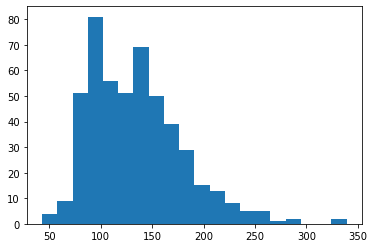

In [42]:
plt.hist(h_max, bins=20)

(array([ 4., 15., 31., 51., 62., 78., 84., 63., 36., 19., 24.,  4.,  8.,
         3.,  3.,  2.,  1.,  1.,  0.,  1.]),
 array([ 11. ,  33.4,  55.8,  78.2, 100.6, 123. , 145.4, 167.8, 190.2,
        212.6, 235. , 257.4, 279.8, 302.2, 324.6, 347. , 369.4, 391.8,
        414.2, 436.6, 459. ]),
 <BarContainer object of 20 artists>)

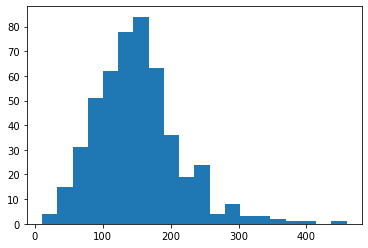

In [43]:
plt.hist(w_min, bins=20)

(array([ 4.,  9., 51., 81., 56., 51., 69., 50., 39., 29., 15., 13.,  8.,
         5.,  5.,  1.,  2.,  0.,  0.,  2.]),
 array([ 43. ,  57.8,  72.6,  87.4, 102.2, 117. , 131.8, 146.6, 161.4,
        176.2, 191. , 205.8, 220.6, 235.4, 250.2, 265. , 279.8, 294.6,
        309.4, 324.2, 339. ]),
 <BarContainer object of 20 artists>)

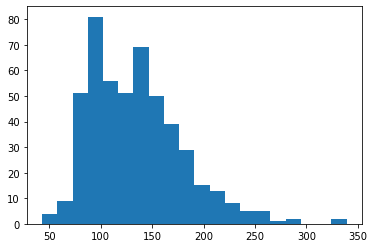

In [44]:
plt.hist(h_max, bins=20)